In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# HPCC

In [178]:
hpcc_compute = pd.read_csv('hpcc - computational.csv')
hpcc_compute

,Benchmark,vm,vm sd,container,container sd,host,host sd
0,HPL,5.128,0.013,5.552,0.034,5.516,0.027
1,Star DGEMM,1.290,0.045,1.303,0.122,1.400,0.005
2,Single DGEMM,1.907,0.077,2.081,0.052,2.054,0.024
3,Star FFT,1.453,0.033,1.832,0.025,1.816,0.008
4,Single FFT,2.638,0.047,2.767,0.054,2.739,0.141
5,MPI FFT,1.231,0.064,3.673,0.124,4.042,0.014


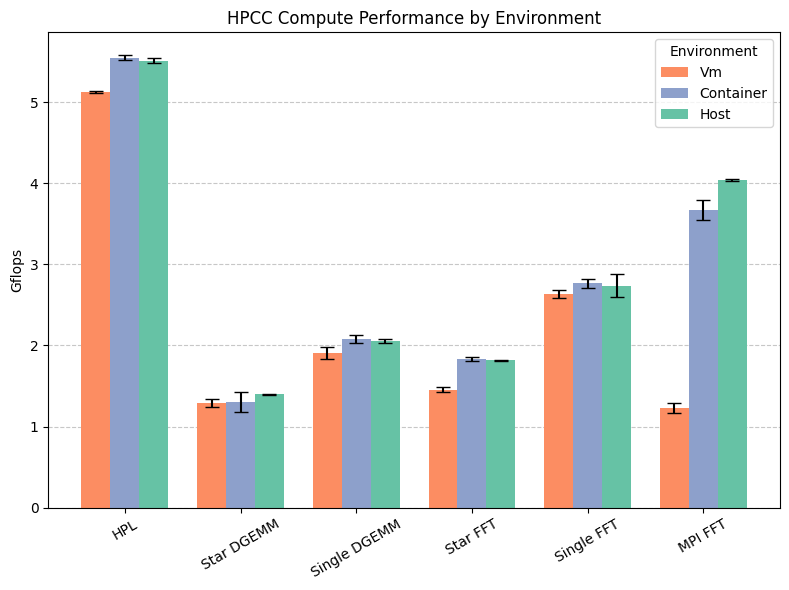

In [179]:
# Prepare data for plotting
benchmarks = hpcc_compute['Benchmark']
environments = ['vm', 'container', 'host']
means = hpcc_compute[environments].values
stds = hpcc_compute[['vm sd', 'container sd', 'host sd']].values

x = np.arange(len(benchmarks))
width = 0.25

palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2], palette[0]]  # VM, Container, Host

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
bars = []
for i, env in enumerate(environments):
    bars.append(
        ax.bar(
            x + i*width - width, 
            means[:, i], 
            width, 
            yerr=stds[:, i], 
            label=env.capitalize(), 
            capsize=5,
            color=custom_colors[i],
            zorder=2,
        )
    )

ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=30)
ax.set_ylabel('Gflops')
ax.set_title('HPCC Compute Performance by Environment')
ax.legend(title='Environment')
plt.tight_layout()
plt.show()


# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_compute_performance.png', dpi=300, bbox_inches='tight')

In [180]:
def plot_multiple_bar_chart(hpcc_compute=hpcc_compute, 
                            plot_title='HPCC Compute Performance by Environment',
                            y_label='Gflops',
                            file_name='hpcc_compute_performance',
                            log_scale=False):
        
    # Prepare data for plotting
    benchmarks = hpcc_compute['Benchmark']
    environments = ['vm', 'container', 'host']
    means = hpcc_compute[environments].values
    stds = hpcc_compute[['vm sd', 'container sd', 'host sd']].values

    x = np.arange(len(benchmarks))
    width = 0.25

    palette = sns.color_palette("Set2", 3)
    custom_colors = [palette[1], palette[2], palette[0]]  # VM, Container, Host

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
    bars = []
    for i, env in enumerate(environments):
        bars.append(
            ax.bar(
                x + i*width - width, 
                means[:, i], 
                width, 
                yerr=stds[:, i], 
                label=env.capitalize(), 
                capsize=5,
                color=custom_colors[i],
                zorder=2,
            )
        )

    ax.set_xticks(x)
    ax.set_xticklabels(benchmarks, rotation=30)
    ax.set_ylabel(y_label)
    if log_scale:
        ax.set_yscale('log')
    ax.set_title(plot_title)
    ax.legend(title='Environment')
    plt.tight_layout()
    plt.show()


    # Save the plot as png in direcory../assets
    fig.savefig(f'../assets/{file_name}.png', dpi=300, bbox_inches='tight')

In [181]:
memory_df = pd.read_csv('hpcc - memory2.csv')
memory_df['Benchmark']

0       MPIRandomAccess_LCG
1           MPIRandomAccess
2      StarRandomAccess_LCG
3    SingleRandomAccess_LCG
4          StarRandomAccess
5        SingleRandomAccess
Name: Benchmark, dtype: object

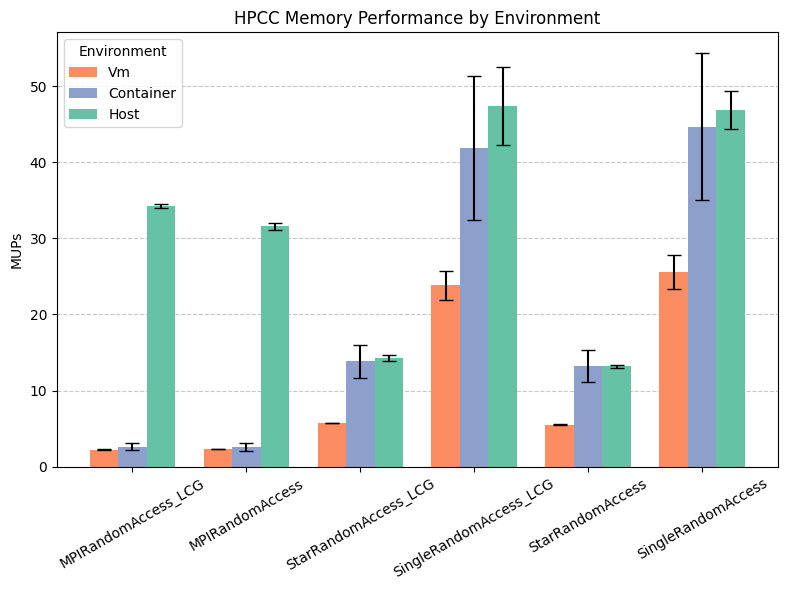

In [182]:
# Prepare data for plotting
benchmarks = memory_df['Benchmark']
environments = ['vm', 'container', 'host']
means = memory_df[environments].values
stds = memory_df[['vm sd', 'container sd', 'host sd']].values

x = np.arange(len(benchmarks))
width = 0.25

palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2], palette[0]]  # VM, Container, Host

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
bars = []
for i, env in enumerate(environments):
    bars.append(
        ax.bar(
            x + i*width - width, 
            means[:, i], 
            width, 
            yerr=stds[:, i], 
            label=env.capitalize(), 
            capsize=5,
            color=custom_colors[i],
            zorder=2,
        )
    )

ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=30)
ax.set_ylabel('MUPs')
ax.set_title('HPCC Memory Performance by Environment')
ax.legend(title='Environment')
plt.tight_layout()
plt.show()


# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_memory_performance.png', dpi=300, bbox_inches='tight')

In [183]:
connection_df = pd.read_csv('hpcc - connection2.csv')
connection_df

,Benchmark,vm,vm sd,container,container sd,host,host sd
0,MinPingPong,1.957,0.066,1.853,0.056,0.201,0.004
1,AvgPingPong,49.026,1.597,6.855,0.600,0.211,0.005
2,MaxPingPong,75.651,2.980,9.962,1.540,0.218,0.004
3,NaturallyOrderedRing,61.426,7.146,5.926,0.376,0.227,0.005
4,RandomlyOrderedRing,63.771,8.449,6.872,0.332,0.230,0.003


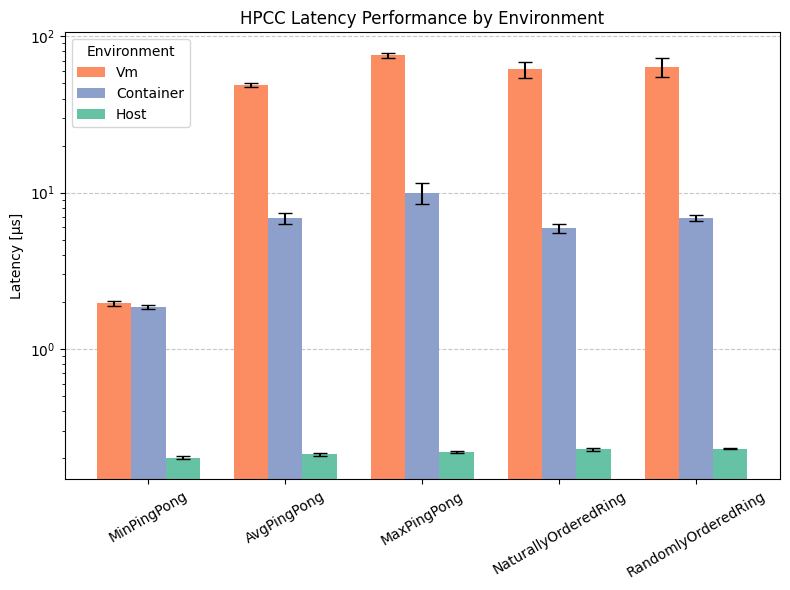

In [184]:
plot_multiple_bar_chart(hpcc_compute=connection_df, 
                            plot_title='HPCC Latency Performance by Environment',
                            y_label='Latency [μs]',
                            file_name='hpcc_latency_performance',
                            log_scale=True)

# stress-ng

In [185]:
stress_ng_raw = pd.read_csv('stress-ng - clean.csv')
stress_ng_raw.head()


,Support,stressor,Bogo Ops/s (Real Time),Bogo Ops/s (Usr+Sys Time)
0,vm,cpu,933.13,933.67
1,vm,cpu,930.14,931.87
2,vm,cpu,929.84,931.11
3,vm,cpu,929.57,930.7
4,vm,cpu,907.39,908.36


In [186]:
stress_cpu = stress_ng_raw[stress_ng_raw['stressor'] == 'cpu']

cpu_means_real = stress_cpu.groupby('Support')["Bogo Ops/s (Real Time)"].apply(lambda x: x.astype(float).mean())
cpu_means_real = cpu_means_real.reindex(['vm', 'container', 'host'])

cpu_sd_real = stress_cpu.groupby('Support')["Bogo Ops/s (Real Time)"].apply(lambda x: x.astype(float).std())
cpu_sd_real = cpu_sd_real.reindex(['vm', 'container', 'host'])

cpu_means_usr = stress_cpu.groupby('Support')["Bogo Ops/s (Usr+Sys Time)"].apply(lambda x: x.astype(float).mean())
cpu_means_usr = cpu_means_usr.reindex(['vm', 'container', 'host'])

cpu_sd_usr = stress_cpu.groupby('Support')["Bogo Ops/s (Usr+Sys Time)"].apply(lambda x: x.astype(float).std())
cpu_sd_usr = cpu_sd_usr.reindex(['vm', 'container', 'host'])

cpu_stats_df = pd.DataFrame({
    'vm': [cpu_means_real['vm'], cpu_means_usr['vm']],
    'vm sd': [cpu_sd_real['vm'], cpu_sd_usr['vm']],
    'container': [cpu_means_real['container'], cpu_means_usr['container']],
    'container sd': [cpu_sd_real['container'], cpu_sd_usr['container']],
    'host': [cpu_means_real['host'], cpu_means_usr['host']],
    'host sd': [cpu_sd_real['host'], cpu_sd_usr['host']],
}, index=['Mean (Real Time)', 'Mean (Usr+Sys Time)'])

cpu_stats_df.insert(0, 'Benchmark', cpu_stats_df.index)
cpu_stats_df.reset_index(drop=True, inplace=True)
cpu_stats_df

,Benchmark,vm,vm sd,container,container sd,host,host sd
0,Mean (Real Time),924.9545,8.092865,1340.9215,13.443668,1348.9825,16.172709
1,Mean (Usr+Sys Time),926.1925,7.904317,1342.2360,13.451038,1349.2445,16.192128


In [187]:
def df_to_latex_mean_pm_dev(df, environments=['vm', 'container', 'host']):
    """
    Convert a DataFrame with mean and std columns for each environment to LaTeX table format,
    displaying values as mean $\pm$ std.
    """
    # Prepare columns for LaTeX
    latex_cols = ['Benchmark']
    for env in environments:
        latex_cols.append(env.capitalize())

    # Build LaTeX table rows
    rows = []
    for idx, row in df.iterrows():
        row_items = [str(row['Benchmark'])]
        for env in environments:
            mean = row[env]
            std = row[f"{env} sd"]
            row_items.append(f"${mean:.2f} \\pm {std:.2f}$")
        rows.append(" & ".join(row_items) + r" \\")
    
    # Build LaTeX table string
    header = " & ".join(latex_cols) + r" \\"
    latex_table = "\\begin{tabular}{l" + "c" * len(environments) + "}\n\\toprule\n"
    latex_table += header + "\n\\midrule\n"
    latex_table += "\n".join(rows) + "\n\\bottomrule\n\\end{tabular}"
    return latex_table


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_9865/3911641013.py:2: SyntaxWarning: invalid escape sequence '\p'
  """


In [188]:

# Example usage:
print(df_to_latex_mean_pm_dev(cpu_stats_df))

\begin{tabular}{lccc}
\toprule
Benchmark & Vm & Container & Host \\
\midrule
Mean (Real Time) & $924.95 \pm 8.09$ & $1340.92 \pm 13.44$ & $1348.98 \pm 16.17$ \\
Mean (Usr+Sys Time) & $926.19 \pm 7.90$ & $1342.24 \pm 13.45$ & $1349.24 \pm 16.19$ \\
\bottomrule
\end{tabular}


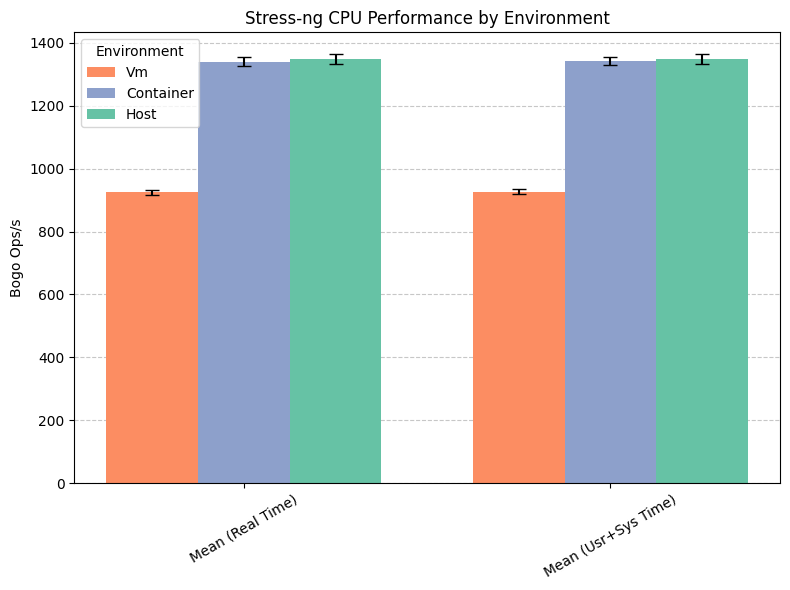

In [189]:

plot_multiple_bar_chart(hpcc_compute=cpu_stats_df,
                            plot_title='Stress-ng CPU Performance by Environment',
                            y_label='Bogo Ops/s',
                            file_name='stress_ng_cpu_performance',
                            log_scale=False)

In [190]:
def synthetize_stress(stressor='cpu', stress_ng_raw=stress_ng_raw):    
    stress_cpu = stress_ng_raw[stress_ng_raw['stressor'] == stressor]

    cpu_means_real = stress_cpu.groupby('Support')["Bogo Ops/s (Real Time)"].apply(lambda x: x.astype(float).mean())
    cpu_means_real = cpu_means_real.reindex(['vm', 'container', 'host'])

    cpu_sd_real = stress_cpu.groupby('Support')["Bogo Ops/s (Real Time)"].apply(lambda x: x.astype(float).std())
    cpu_sd_real = cpu_sd_real.reindex(['vm', 'container', 'host'])

    cpu_means_usr = stress_cpu.groupby('Support')["Bogo Ops/s (Usr+Sys Time)"].apply(lambda x: x.astype(float).mean())
    cpu_means_usr = cpu_means_usr.reindex(['vm', 'container', 'host'])

    cpu_sd_usr = stress_cpu.groupby('Support')["Bogo Ops/s (Usr+Sys Time)"].apply(lambda x: x.astype(float).std())
    cpu_sd_usr = cpu_sd_usr.reindex(['vm', 'container', 'host'])

    cpu_stats_df = pd.DataFrame({
        'vm': [cpu_means_real['vm'], cpu_means_usr['vm']],
        'vm sd': [cpu_sd_real['vm'], cpu_sd_usr['vm']],
        'container': [cpu_means_real['container'], cpu_means_usr['container']],
        'container sd': [cpu_sd_real['container'], cpu_sd_usr['container']],
        'host': [cpu_means_real['host'], cpu_means_usr['host']],
        'host sd': [cpu_sd_real['host'], cpu_sd_usr['host']],
    }, index=['Bogo Ops/s (Real Time)', 'Bogo Ops/s (Usr+Sys Time)'])

    cpu_stats_df.insert(0, 'Benchmark', cpu_stats_df.index)
    cpu_stats_df.reset_index(drop=True, inplace=True)
    return cpu_stats_df

In [191]:
stress_ng_raw = pd.read_csv('stress-ng - clean.csv')
# Convert columns to numeric before calculating the mean
stress_ng_raw['Bogo Ops/s (Real Time)'] = pd.to_numeric(stress_ng_raw['Bogo Ops/s (Real Time)'].str.replace(',', ''), errors='coerce')
stress_ng_raw['Bogo Ops/s (Usr+Sys Time)'] = pd.to_numeric(stress_ng_raw['Bogo Ops/s (Usr+Sys Time)'].str.replace(',', ''), errors='coerce')
stress_ng_raw[stress_ng_raw['stressor'] == 'memory'].head()

,Support,stressor,Bogo Ops/s (Real Time),Bogo Ops/s (Usr+Sys Time)
40,vm,memory,40182.77,42949.06
41,vm,memory,40030.53,43461.27
42,vm,memory,40034.76,43565.01
43,vm,memory,39275.36,41228.56
44,vm,memory,40374.06,40446.34


In [192]:

stress_memory = synthetize_stress(stressor='memory', stress_ng_raw=stress_ng_raw)
stress_memory

,Benchmark,vm,vm sd,container,container sd,host,host sd
0,Bogo Ops/s (Real Time),40182.6865,265.417465,52180.350000,5024.639649,53899.871765,4947.845998
1,Bogo Ops/s (Usr+Sys Time),41433.7495,951.507057,66543.321667,2954.414005,62686.966471,3254.219624


In [193]:
print(df_to_latex_mean_pm_dev(stress_memory))

\begin{tabular}{lccc}
\toprule
Benchmark & Vm & Container & Host \\
\midrule
Bogo Ops/s (Real Time) & $40182.69 \pm 265.42$ & $52180.35 \pm 5024.64$ & $53899.87 \pm 4947.85$ \\
Bogo Ops/s (Usr+Sys Time) & $41433.75 \pm 951.51$ & $66543.32 \pm 2954.41$ & $62686.97 \pm 3254.22$ \\
\bottomrule
\end{tabular}


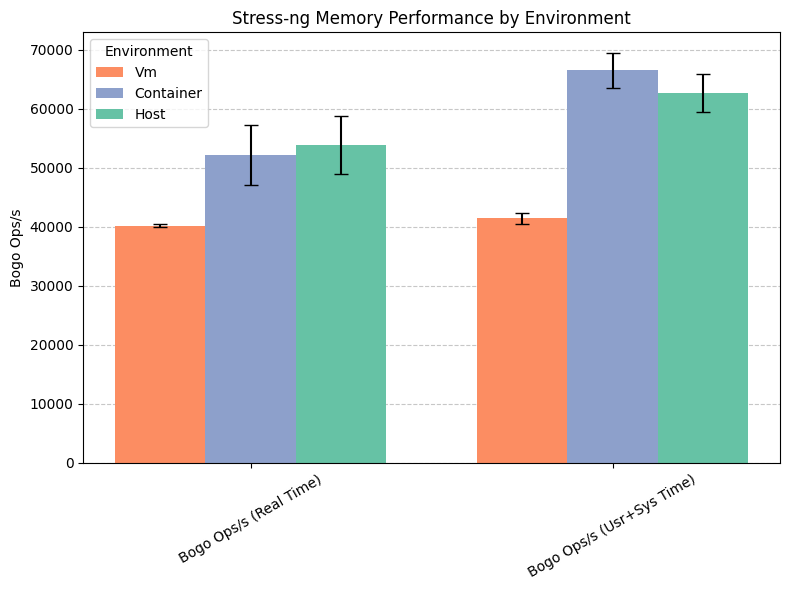

In [194]:
multiple_bar_chart = plot_multiple_bar_chart(hpcc_compute=stress_memory,
                            plot_title='Stress-ng Memory Performance by Environment',
                            y_label='Bogo Ops/s',
                            file_name='stress_ng_memory_performance',
                            log_scale=False)

# sysbench

In [195]:
sysbench_cpu = pd.read_csv('sysbench - cpu.csv')
sysbench_cpu.head()

,support,events_per_sec,total_time,total_events,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,453.61,10.0004,4537,2.03,2.20,7.37,2.35,9997.35,4537,0,9.9973,0
1,vm,454.32,10.0004,4544,2.04,2.20,6.75,2.35,9997.37,4544,0,9.9974,0
2,vm,454.85,10.0018,4550,2.03,2.20,5.18,2.35,9998.86,4550,0,9.9989,0
3,vm,455.40,10.0008,4555,2.03,2.19,8.29,2.35,9998.04,4555,0,9.9980,0
4,vm,451.09,10.0009,4512,2.06,2.22,6.20,2.39,9997.94,4512,0,9.9979,0


In [196]:
sysbench_cpu.drop(columns=['total_time', 'total_events','latency_95th',
                           'fairness_events_avg','fairness_events_stddev',
                            'fairness_time_avg','fairness_time_stddev'], inplace=True)


In [197]:
sysbench_cpu.head()

,support,events_per_sec,latency_min,latency_avg,latency_max,latency_sum
0,vm,453.61,2.03,2.20,7.37,9997.35
1,vm,454.32,2.04,2.20,6.75,9997.37
2,vm,454.85,2.03,2.20,5.18,9998.86
3,vm,455.40,2.03,2.19,8.29,9998.04
4,vm,451.09,2.06,2.22,6.20,9997.94


In [198]:
cpu_clean = pd.DataFrame()
cpu_clean['Benchmark'] = ['Events/s', 'Latency min (ms)', 'Latency avg (ms)', 'Latency max (ms)', 'Latency sum (ms)']

cpu_clean['vm']=(sysbench_cpu[sysbench_cpu['support'] == 'vm'].iloc[:, 1:].mean()).values
cpu_clean['vm sd']=(sysbench_cpu[sysbench_cpu['support'] == 'vm'].iloc[:, 1:].std()).values
cpu_clean['container']=(sysbench_cpu[sysbench_cpu['support'] == 'container'].iloc[:, 1:].mean()).values
cpu_clean['container sd']=(sysbench_cpu[sysbench_cpu['support'] == 'container'].iloc[:, 1:].std()).values
cpu_clean['host']=(sysbench_cpu[sysbench_cpu['support'] == 'host'].iloc[:, 1:].mean()).values
cpu_clean['host sd']=(sysbench_cpu[sysbench_cpu['support'] == 'host'].iloc[:, 1:].std()).values
cpu_clean.reset_index(drop=True, inplace=True)
cpu_clean


,Benchmark,vm,vm sd,container,container sd,host,host sd
0,Events/s,453.974706,1.276093,459.738889,2.542694,452.3815,6.758361
1,Latency min (ms),2.041765,0.012367,2.031111,0.004714,2.0510,0.015861
2,Latency avg (ms),2.202941,0.006860,2.173889,0.011448,2.2105,0.033162
3,Latency max (ms),6.050588,1.181506,6.145000,2.728012,5.4925,1.555418
4,Latency sum (ms),9998.152353,0.700594,9999.554444,0.513033,9999.5600,0.723428


In [199]:
print(df_to_latex_mean_pm_dev(cpu_clean))

\begin{tabular}{lccc}
\toprule
Benchmark & Vm & Container & Host \\
\midrule
Events/s & $453.97 \pm 1.28$ & $459.74 \pm 2.54$ & $452.38 \pm 6.76$ \\
Latency min (ms) & $2.04 \pm 0.01$ & $2.03 \pm 0.00$ & $2.05 \pm 0.02$ \\
Latency avg (ms) & $2.20 \pm 0.01$ & $2.17 \pm 0.01$ & $2.21 \pm 0.03$ \\
Latency max (ms) & $6.05 \pm 1.18$ & $6.14 \pm 2.73$ & $5.49 \pm 1.56$ \\
Latency sum (ms) & $9998.15 \pm 0.70$ & $9999.55 \pm 0.51$ & $9999.56 \pm 0.72$ \\
\bottomrule
\end{tabular}


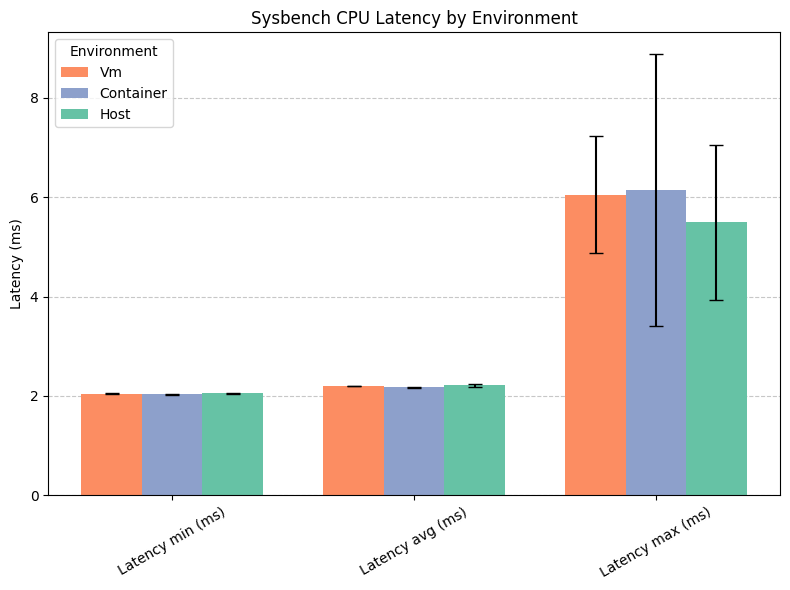

In [200]:
cpu_latency = cpu_clean[cpu_clean['Benchmark'].isin(['Latency min (ms)', 'Latency avg (ms)', 'Latency max (ms)'])]
plot_multiple_bar_chart(hpcc_compute=cpu_latency,
                            plot_title='Sysbench CPU Latency by Environment',
                            y_label='Latency (ms)',
                            file_name='sysbench_cpu_latency_performance',
                            log_scale=False)


In [201]:
sysbench_memory = pd.read_csv('sysbench - memory.csv')
sysbench_memory.columns

Index(['support', 'total_operations', 'ops_per_sec', 'transfer_mib',
       'transfer_rate_mibs', 'total_time', 'latency_min', 'latency_avg',
       'latency_max', 'latency_95th', 'latency_sum', 'fairness_events_avg',
       'fairness_events_stddev', 'fairness_time_avg', 'fairness_time_stddev'],
      dtype='object')

In [202]:
sysbench_memory.drop(columns=['total_operations', 'transfer_mib',
       'total_time', 'latency_95th', 'fairness_events_avg',
       'fairness_events_stddev', 'fairness_time_avg', 'fairness_time_stddev'], inplace=True)
sysbench_memory.head()

,support,ops_per_sec,transfer_rate_mibs,latency_min,latency_avg,latency_max,latency_sum
0,vm,4084237.70,3988.51,0,0,2.51,1063.98
1,vm,4050951.60,3956.01,0,0,1.67,1072.58
2,vm,4031061.30,3936.58,0,0,1.34,1077.06
3,vm,4095310.05,3999.33,0,0,0.90,1059.26
4,vm,4080990.49,3985.34,0,0,0.90,1062.70


In [203]:
memory_clean = pd.DataFrame()
memory_clean['Benchmark'] = ['Ops/s', 'Transfer rate (mibs)', 'Latency min (ms)', 'Latency avg (ms)', 'Latency max (ms)', 'Latency sum (ms)']
memory_clean['vm']=(sysbench_memory[sysbench_memory['support'] == 'vm'].iloc[:, 1:].mean()).values
memory_clean['vm sd']=(sysbench_memory[sysbench_memory['support'] == 'vm'].iloc[:, 1:].std()).values
memory_clean['container']=(sysbench_memory[sysbench_memory['support'] == 'container'].iloc[:, 1:].mean()).values
memory_clean['container sd']=(sysbench_memory[sysbench_memory['support'] == 'container'].iloc[:, 1:].std()).values
memory_clean['host']=(sysbench_memory[sysbench_memory['support'] == 'host'].iloc[:, 1:].mean()).values
memory_clean['host sd']=(sysbench_memory[sysbench_memory['support'] == 'host'].iloc[:, 1:].std()).values
memory_clean.reset_index(drop=True, inplace=True)
memory_clean


,Benchmark,vm,vm sd,container,container sd,host,host sd
0,Ops/s,4.072625e+06,24459.860053,5.780691e+06,98893.391446,5.445333e+06,82057.665361
1,Transfer rate (mibs),3.977174e+03,23.886997,5.645206e+03,96.574794,5.317708e+03,80.134450
2,Latency min (ms),0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,Latency avg (ms),0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
4,Latency max (ms),1.263333e+00,0.495533,1.322500e+00,0.619090,1.089500e+00,0.242953
5,Latency sum (ms),1.066094e+03,8.006890,8.399885e+02,14.633837,8.957915e+02,18.403881


In [204]:
cols = ['vm', 'vm sd', 'container', 'container sd', 'host', 'host sd']
memory_clean.loc[memory_clean['Benchmark'] == 'Ops/s', cols] /= 1e6
memory_clean.loc[memory_clean['Benchmark'] == 'Ops/s', 'Benchmark'] = 'GOps/s'


In [205]:

memory_clean.loc[memory_clean['Benchmark'] == 'Transfer rate (mibs)', cols] /= 1024
memory_clean.loc[memory_clean['Benchmark'] == 'Transfer rate (mibs)', 'Benchmark'] = 'Transfer rate (Gibs)'


In [206]:
print(df_to_latex_mean_pm_dev(memory_clean))


\begin{tabular}{lccc}
\toprule
Benchmark & Vm & Container & Host \\
\midrule
GOps/s & $4.07 \pm 0.02$ & $5.78 \pm 0.10$ & $5.45 \pm 0.08$ \\
Transfer rate (Gibs) & $3.88 \pm 0.02$ & $5.51 \pm 0.09$ & $5.19 \pm 0.08$ \\
Latency min (ms) & $0.00 \pm 0.00$ & $0.00 \pm 0.00$ & $0.00 \pm 0.00$ \\
Latency avg (ms) & $0.00 \pm 0.00$ & $0.00 \pm 0.00$ & $0.00 \pm 0.00$ \\
Latency max (ms) & $1.26 \pm 0.50$ & $1.32 \pm 0.62$ & $1.09 \pm 0.24$ \\
Latency sum (ms) & $1066.09 \pm 8.01$ & $839.99 \pm 14.63$ & $895.79 \pm 18.40$ \\
\bottomrule
\end{tabular}


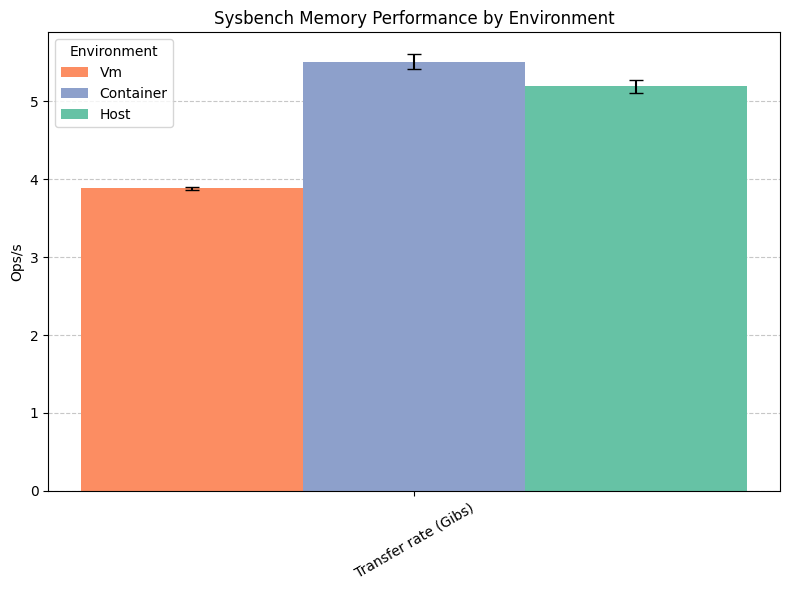

In [207]:
memory_latency = memory_clean[memory_clean['Benchmark'].isin(['Transfer rate (Gibs)'])]
plot_multiple_bar_chart(hpcc_compute=memory_latency,
                            plot_title='Sysbench Memory Performance by Environment',
                            y_label='Ops/s',
                            file_name='sysbench_memory_performance',
                            log_scale=False)


# IOZone

In [208]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_fixed_filesize(vm_df, vm_sh_df, container_df, host_df, doc_sh_df, filesize, plot_name):
#     '''
#     Plot for a fixed filesize the throughput as a function of the blocksize
#     for all the environments, including shaded variants for VM and Doc.
#     '''
#     filesize_col = str(filesize)

#     # Base palette and color assignment
#     palette = sns.color_palette("Set2", 3)
#     custom_colors = [palette[1], palette[2], palette[0]]  # VM, Container, Host

#     # Create darker versions of the colors
#     darker_colors = [tuple([c * 0.6 for c in color]) for color in custom_colors]

#     plt.figure(figsize=(8, 6))

#     # Main plots
#     plt.semilogx(vm_df['block_size'], vm_df[filesize_col]/1000, marker='o', label='VM', color=custom_colors[0])
#     plt.semilogx(container_df['block_size'], container_df[filesize_col]/1000, marker='s', label='Container', color=custom_colors[1])
#     if host_df is not None:
#         plt.semilogx(host_df['block_size'], host_df[filesize_col]/1000, marker='^', label='Host', color=custom_colors[2])

#     # Shaded variants (darker)
#     if vm_sh_df is not None:
#         plt.semilogx(vm_sh_df['block_size'], vm_sh_df[filesize_col]/1000, linestyle='--', marker='o', label='VM (Shaded)', color=darker_colors[0])
#     if doc_sh_df is not None:
#         plt.semilogx(doc_sh_df['block_size'], doc_sh_df[filesize_col]/1000, linestyle='--', marker='s', label='Container (Shaded)', color=darker_colors[1])

#     plt.xlabel('Block Size (KB)')
#     plt.xscale('log', base=2)
#     plt.ylabel('Throughput (MB/s)')
#     plt.title(f'Throughput vs Block Size for File Size {filesize_col} KB')
#     plt.legend()
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.savefig(f'../assets/{plot_name}_filesize_{filesize_col}.png', dpi=300, bbox_inches='tight')
#     plt.show()


In [209]:
def plot_fixed_filesize(vm_df, vm_sh_df, container_df, host_df, doc_sh_df, filesize, plot_name):
    '''
    Plot for a fixed filesize the throughput as a function of the blocksize
    for all the environments, including shaded variants for VM and Doc.
    '''
    # Usa direttamente filesize come intero, non serve convertirlo in stringa
    filesize_col = filesize

    # Base palette and color assignment
    palette = sns.color_palette("Set2", 3)
    custom_colors = [palette[1], palette[2], palette[0]]  # VM, Container, Host
    darker_colors = [tuple([c * 0.6 for c in color]) for color in custom_colors]

    plt.figure(figsize=(8, 6))

    # Main plots
    plt.semilogx(vm_df['block_size'], vm_df[filesize_col]/1000, marker='o', label='VM', color=custom_colors[0])
    plt.semilogx(container_df['block_size'], container_df[filesize_col]/1000, marker='s', label='Container', color=custom_colors[1])
    if host_df is not None:
        plt.semilogx(host_df['block_size'], host_df[filesize_col]/1000, marker='^', label='Host', color=custom_colors[2])

    # Shaded variants (darker)
    if vm_sh_df is not None:
        plt.semilogx(vm_sh_df['block_size'], vm_sh_df[filesize_col]/1000, linestyle='--', marker='o', label='VM (Shaded)', color=darker_colors[0])
    if doc_sh_df is not None:
        plt.semilogx(doc_sh_df['block_size'], doc_sh_df[filesize_col]/1000, linestyle='--', marker='s', label='Container (Shaded)', color=darker_colors[1])

    plt.xlabel('Block Size (KB)')
    plt.xscale('log', base=2)
    plt.ylabel('Throughput (MB/s)')
    plt.title(f'Throughput vs Block Size for File Size {filesize} KB')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'../assets/{plot_name}_filesize_{filesize}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [210]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

def plot_log_surfaces_side_by_side_log(df1, df2, label1='DF1', label2='DF2', cmap1='viridis', cmap2='plasma'):
    block_sizes = df1['block_size'].values
    file_sizes = df1.columns[1:].astype(int).values

    log_file_sizes = np.log10(file_sizes)
    log_block_sizes = np.log10(block_sizes)
    X, Y = np.meshgrid(log_file_sizes, log_block_sizes)

    def prepare_log_surface(df):
        Z = df.iloc[:, 1:].values.astype(float)
        Z[Z <= 0] = np.nan
        Z = Z/1000
        return np.ma.masked_invalid(Z)

    Z1 = prepare_log_surface(df1)
    Z2 = prepare_log_surface(df2)

    combined = np.ma.concatenate([Z1.compressed(), Z2.compressed()])
    zmin = np.nanmin(combined)
    zmax = np.nanmax(combined)
    norm = colors.Normalize(vmin=zmin, vmax=zmax)

    # Create figure with tight layout and shared colorbar
    fig = plt.figure(figsize=(14, 6))
    spec = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1)

    # Plot 1
    ax1 = fig.add_subplot(spec[0], projection='3d')
    surf1 = ax1.plot_surface(X, Y, Z1, cmap=cmap1, norm=norm, edgecolor='k', linewidth=0.5, alpha=0.9)
    ax1.set_title(f'{label1} (Throughput)')
    ax1.set_xlabel('File Size (KB)')
    ax1.set_ylabel('Block Size (KB)')
    ax1.set_zlabel('Throughput (MB/s)')
    ax1.set_zlim(zmin, zmax)
    ax1.set_xticks(log_file_sizes)
    ax1.set_xticklabels(file_sizes)
    ax1.set_yticks(log_block_sizes)
    ax1.set_yticklabels(block_sizes)
    ax1.view_init(elev=30, azim=+45)  # Rotate to make low x/y values in far corner

    # Plot 2
    ax2 = fig.add_subplot(spec[1], projection='3d')
    surf2 = ax2.plot_surface(X, Y, Z2, cmap=cmap2, norm=norm, edgecolor='k', linewidth=0.5, alpha=0.9)
    ax2.set_title(f'{label2} (Throughput)')
    ax2.set_xlabel('File Size (KB)')
    ax2.set_ylabel('Block Size (KB)')
    ax2.set_zlabel('Throughput (MB/s)')
    ax2.set_zlim(zmin, zmax)
    ax2.set_xticks(log_file_sizes)
    ax2.set_xticklabels(file_sizes)
    ax2.set_yticks(log_block_sizes)
    ax2.set_yticklabels(block_sizes)
    ax2.view_init(elev=30, azim=45)

    # Shared colorbar
    cax = fig.add_subplot(spec[2])
    fig.colorbar(surf2, cax=cax, label='Throughput (MB/s)', norm=norm)

    plt.tight_layout()
    plt.show()

    fig.savefig(f'../assets/{label1}_{label2}_log_surfaces.png', dpi=300, bbox_inches='tight')


In [211]:
def load_and_transform_csv(path):
    df_raw = pd.read_csv(path, index_col=0)
    df = df_raw.transpose()
    df.index.name = 'block_size'
    df.reset_index(inplace=True)
    df.columns = ['block_size'] + df.columns[1:].tolist()
    df['block_size'] = df['block_size'].astype(int)
    return df


## loc reader

In [212]:
import pandas as pd
import seaborn as sns

In [213]:
doc_loc_reader = load_and_transform_csv('./iozone/doc_loc_reader_report.csv')
vm_loc_reader = load_and_transform_csv('./iozone/vm_loc_reader_report.csv')
host_loc_reader = load_and_transform_csv('./iozone/host_reader_report.csv')

In [214]:
print(doc_loc_reader.columns.tolist())


['block_size', 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]


/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


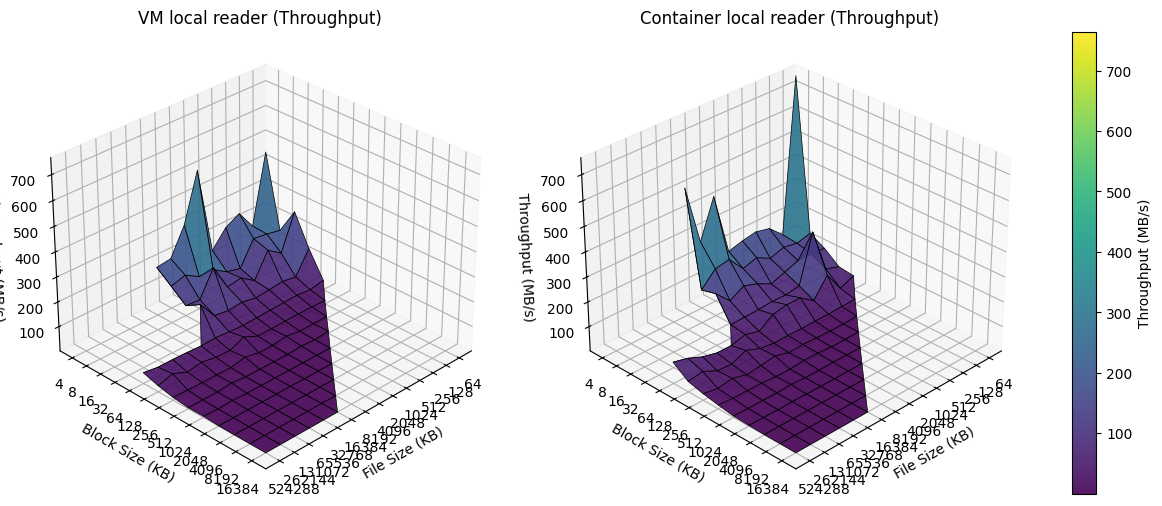

In [215]:
plot_log_surfaces_side_by_side_log(vm_loc_reader, doc_loc_reader, label1='VM local reader', label2='Container local reader', cmap1='viridis', cmap2='viridis')
# plot_log_surfaces_stacked(vm_loc_reader, doc_loc_reader, label1='VM local reader', label2='Container local reader', cmap1='viridis', cmap2='viridis')

## shared reader

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


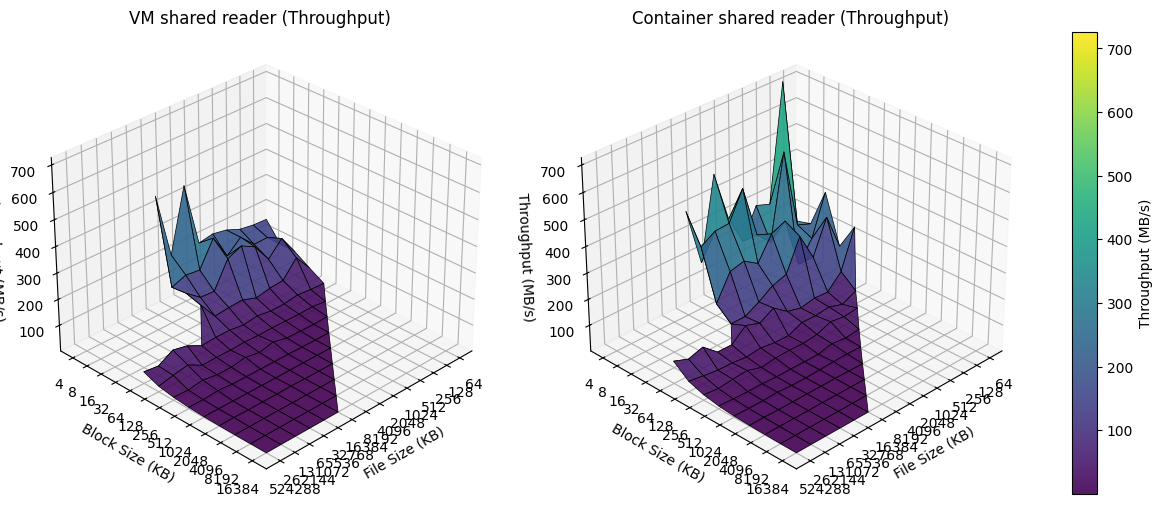

In [216]:
doc_sh_reader = load_and_transform_csv('./iozone/doc_sh_reader_report.csv')
vm_sh_reader = load_and_transform_csv('./iozone/vm_sh_reader_report.csv')
plot_log_surfaces_side_by_side_log(vm_sh_reader, doc_sh_reader, label1='VM shared reader', label2='Container shared reader', cmap1='viridis', cmap2='viridis')


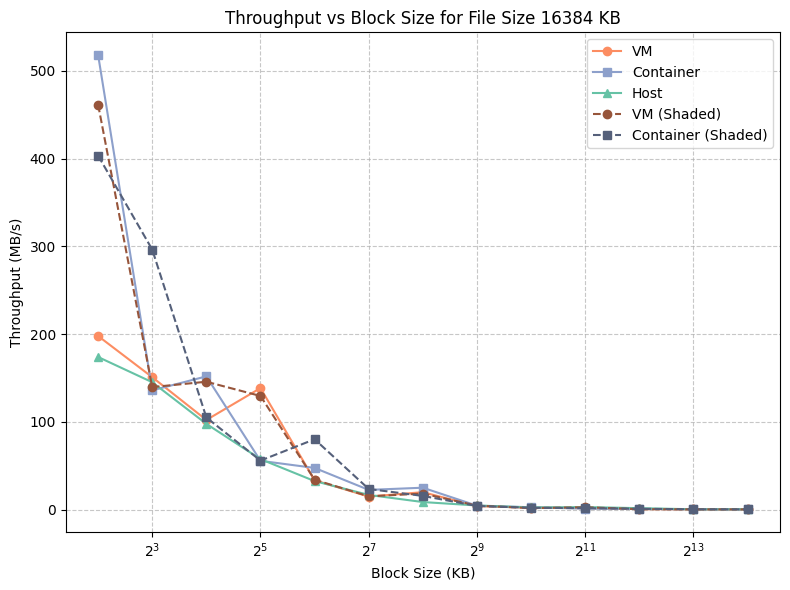

In [217]:
plot_fixed_filesize(vm_df= vm_loc_reader, vm_sh_df=vm_sh_reader, container_df= doc_loc_reader, 
                    host_df=host_loc_reader, doc_sh_df=doc_sh_reader, filesize=16384, plot_name='reader')


## loc writer

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


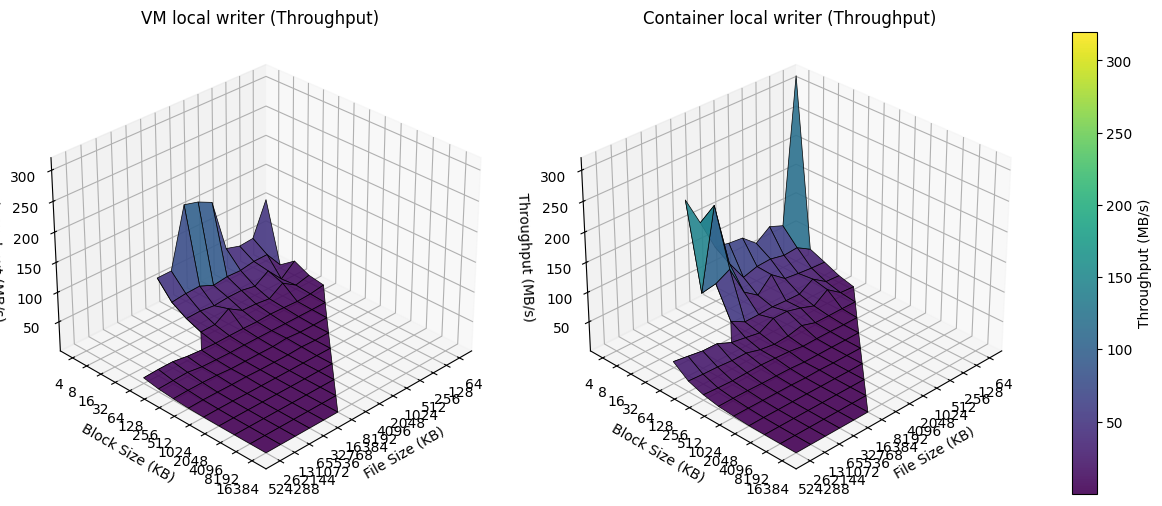

In [218]:
doc_loc_writer = load_and_transform_csv('./iozone/doc_loc_writer_report.csv')
vm_loc_writer = load_and_transform_csv('./iozone/vm_loc_writer_report.csv')
host_writer = load_and_transform_csv('./iozone/host_writer_report.csv')
plot_log_surfaces_side_by_side_log(vm_loc_writer, doc_loc_writer, label1='VM local writer', label2='Container local writer', cmap1='viridis', cmap2='viridis')

## shared writer

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


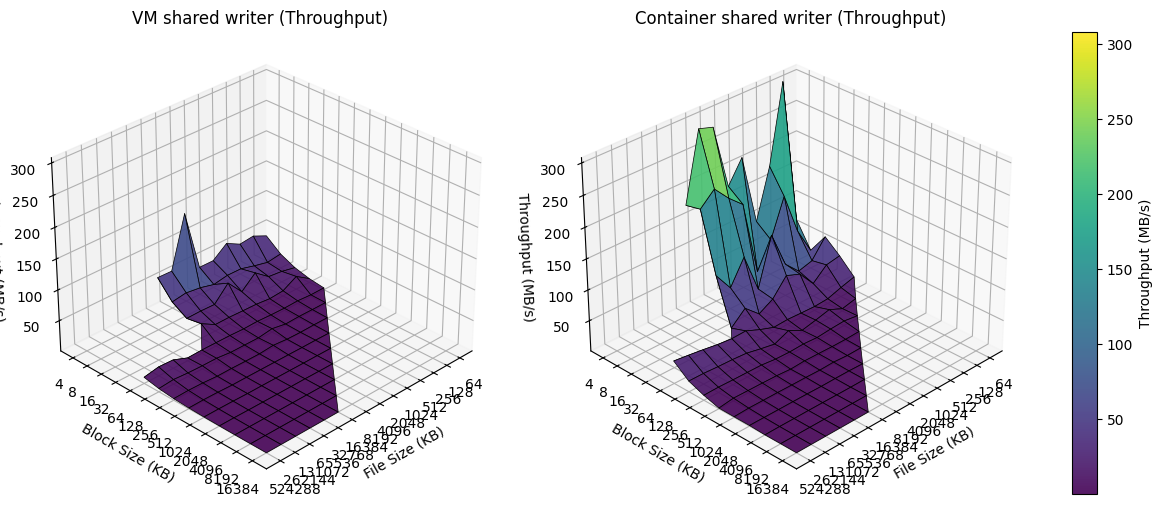

In [219]:
doc_sh_writer = load_and_transform_csv('./iozone/doc_sh_writer_report.csv')
vm_sh_writer = load_and_transform_csv('./iozone/vm_sh_writer_report.csv')

plot_log_surfaces_side_by_side_log(vm_sh_writer, doc_sh_writer, label1='VM shared writer', label2='Container shared writer', cmap1='viridis', cmap2='viridis')

In [220]:
host_loc_writer = load_and_transform_csv('./iozone/host_writer_report.csv')


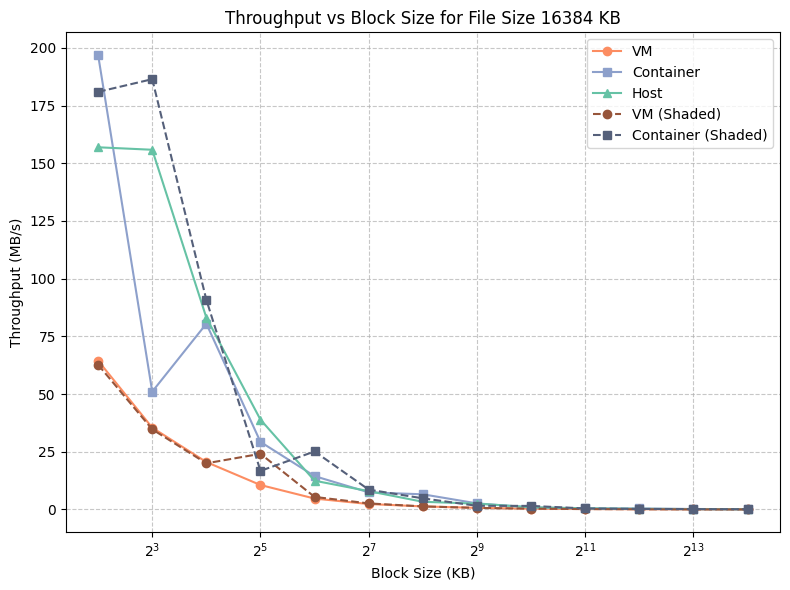

In [221]:
plot_fixed_filesize(vm_df= vm_loc_writer, vm_sh_df=vm_sh_writer, container_df= doc_loc_writer, 
                    host_df=host_loc_writer, doc_sh_df=doc_sh_writer, filesize=16384, plot_name='writer')


## random read loc

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


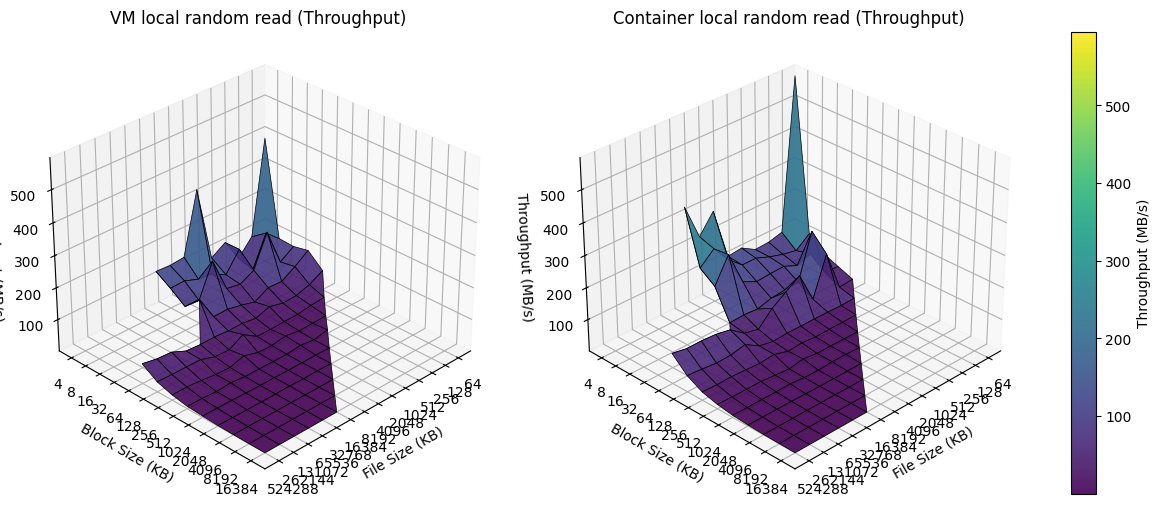

In [222]:
doc_loc_random_read = load_and_transform_csv('./iozone/doc_loc_random_read_report.csv')
vm_loc_random_read = load_and_transform_csv('./iozone/vm_loc_random_read_report.csv')

plot_log_surfaces_side_by_side_log(vm_loc_random_read, doc_loc_random_read, label1='VM local random read', label2='Container local random read', cmap1='viridis', cmap2='viridis')

## random read shared

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


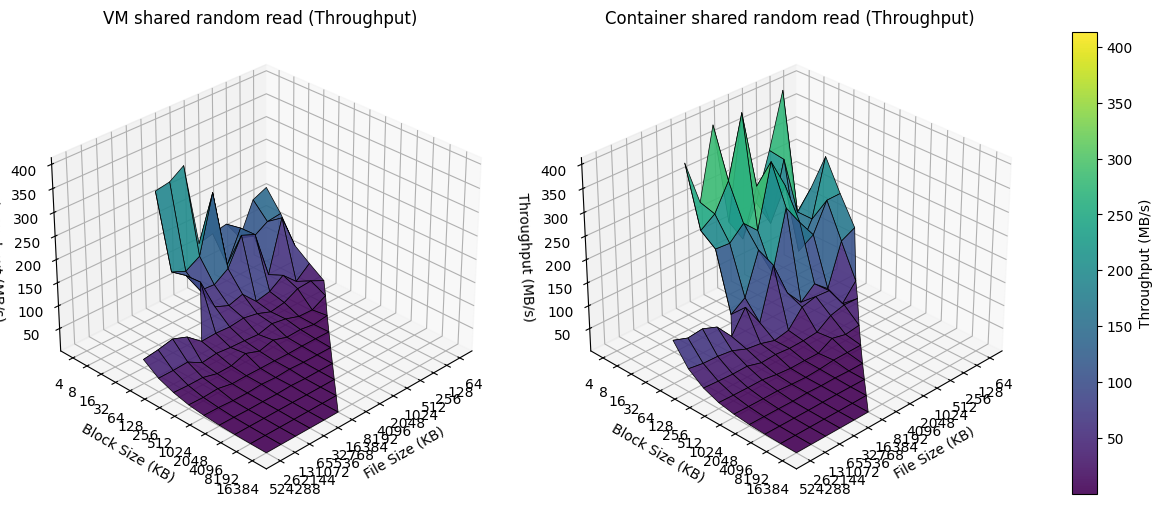

In [223]:
doc_sh_random_read = load_and_transform_csv('./iozone/doc_sh_random_read_report.csv')
vm_sh_random_read = load_and_transform_csv('./iozone/vm_sh_random_read_report.csv')

plot_log_surfaces_side_by_side_log(vm_sh_random_read, doc_sh_random_read, label1='VM shared random read', label2='Container shared random read', cmap1='viridis', cmap2='viridis')

In [224]:
host_loc_random_read = load_and_transform_csv('./iozone/host_random_read_report.csv')

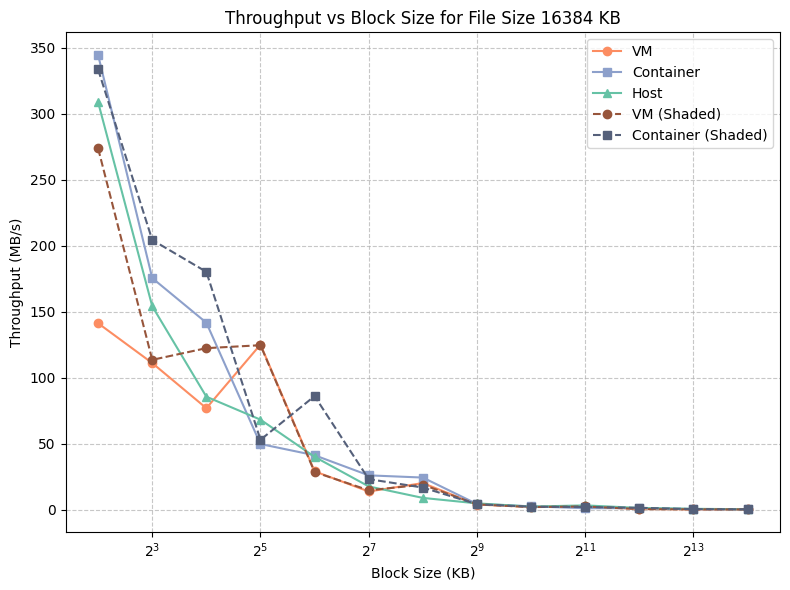

In [225]:
plot_fixed_filesize(vm_df= vm_loc_random_read, vm_sh_df=vm_sh_random_read, container_df= doc_loc_random_read, 
                    host_df=host_loc_random_read, doc_sh_df=doc_sh_random_read, filesize=16384, plot_name='random read')


## random write loc

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


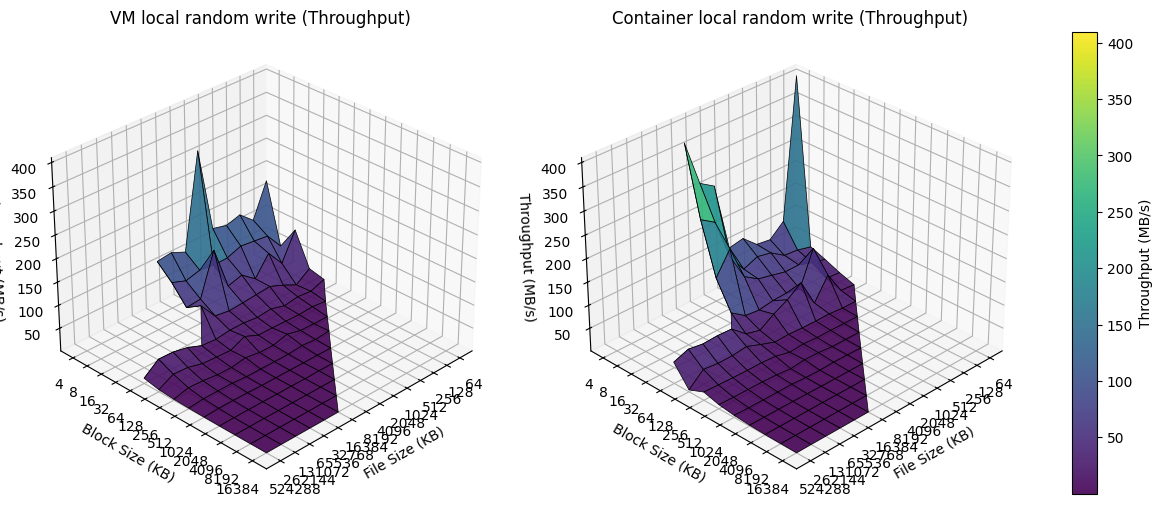

In [226]:
doc_loc_random_write = load_and_transform_csv('./iozone/doc_loc_random_write_report.csv')
vm_loc_random_write = load_and_transform_csv('./iozone/vm_loc_random_write_report.csv')

plot_log_surfaces_side_by_side_log(vm_loc_random_write, doc_loc_random_write, label1='VM local random write', label2='Container local random write', cmap1='viridis', cmap2='viridis')

## random write sh

/tmp/ipykernel_9865/3711125524.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


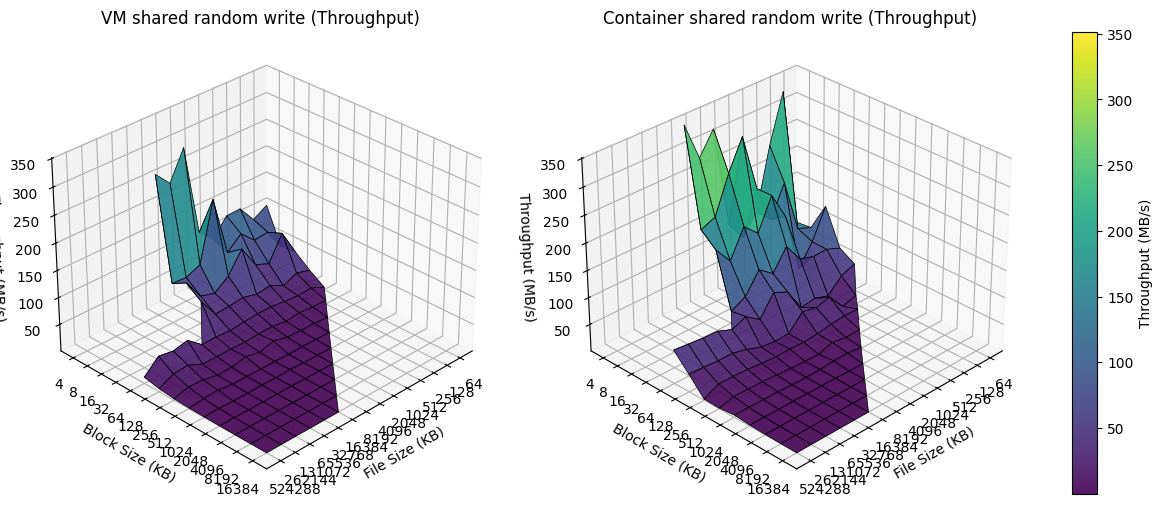

In [227]:
doc_sh_random_write = load_and_transform_csv('./iozone/doc_sh_random_write_report.csv')
vm_sh_random_write = load_and_transform_csv('./iozone/vm_sh_random_write_report.csv')

plot_log_surfaces_side_by_side_log(vm_sh_random_write, doc_sh_random_write, label1='VM shared random write', label2='Container shared random write', cmap1='viridis', cmap2='viridis')

In [228]:
host_loc_random_write = load_and_transform_csv('./iozone/host_random_write_report.csv')

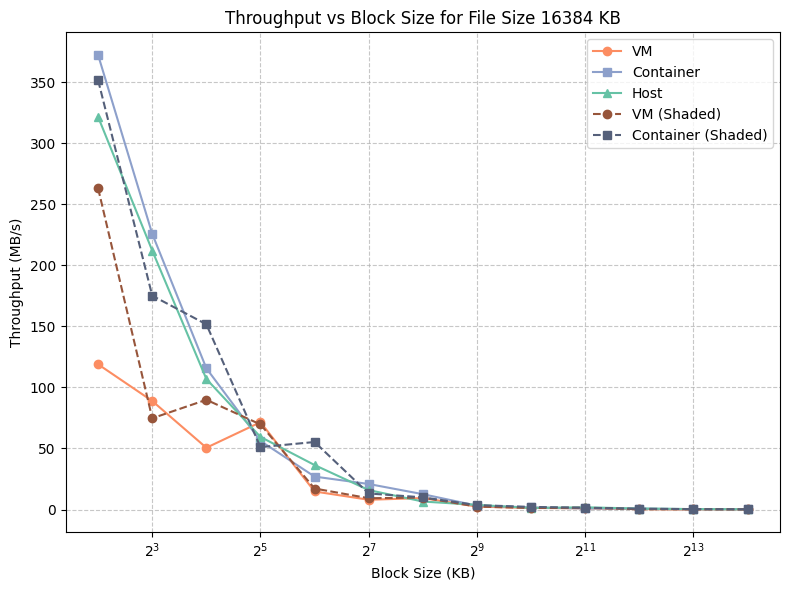

In [229]:
plot_fixed_filesize(vm_df= vm_loc_random_write, vm_sh_df=vm_sh_random_write, container_df= doc_loc_random_write, 
                    host_df=host_loc_random_write, doc_sh_df=doc_sh_random_write, filesize=16384, plot_name='random write')


# iperf

In [230]:
tcp_upload = pd.read_csv('./iperf - TCP (upload).csv')
tcp_upload.head()

,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6
0,vm,node01,0.00-1.00,367.0,MBytes,3.08,Gbits/sec
1,vm,node01,1.00-2.00,385.0,MBytes,3.23,Gbits/sec
2,vm,node01,2.00-3.00,392.0,MBytes,3.29,Gbits/sec
3,vm,node01,3.00-4.00,398.0,MBytes,3.34,Gbits/sec
4,vm,node01,4.00-5.00,406.0,MBytes,3.41,Gbits/sec


In [231]:
# Define a mapping for metric prefixes to their decimal multipliers
prefix_multipliers = {
    'K': 1e3,
    'M': 1e6,
    'G': 1e9
}

# Helper function to convert value and unit to decimal
def convert_with_unit(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    unit = str(unit)
    for prefix, multiplier in prefix_multipliers.items():
        if unit.startswith(prefix):
            return float(value) * multiplier
    return float(value)

In [232]:

# Convert 'Transfer' and 'Bitrate' columns to decimal format
tcp_upload['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(tcp_upload['Transfer'], tcp_upload['Unnamed: 4'])
]
tcp_upload['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(tcp_upload['Bitrate'], tcp_upload['Unnamed: 6'])
]

# Drop the old columns and rename for clarity
tcp_upload = tcp_upload.drop(columns=['Transfer', 'Unnamed: 4', 'Bitrate', 'Unnamed: 6'])


# divide the column Bitrate (bits/sec) by 1e9 to convert to Gbps
tcp_upload['Bitrate (Gbps)'] = tcp_upload['Bitrate (bits/sec)'] / 1e9
# divide the column Transfer (Bytes) by 1e9 to convert to GB
tcp_upload['Transfer (GB)'] = tcp_upload['Transfer (Bytes)'] / 1e9
# drop the old columns
tcp_upload.drop(columns=['Bitrate (bits/sec)', 'Transfer (Bytes)'], inplace=True)
tcp_upload.head()


,Support,Link,Interval (sec),Bitrate (Gbps),Transfer (GB)
0,vm,node01,0.00-1.00,3.08,0.367
1,vm,node01,1.00-2.00,3.23,0.385
2,vm,node01,2.00-3.00,3.29,0.392
3,vm,node01,3.00-4.00,3.34,0.398
4,vm,node01,4.00-5.00,3.41,0.406


In [233]:
clean_tcp_upload = pd.DataFrame()
tcp_upload.drop(columns=['Link', 'Interval (sec)'], inplace=True)


In [234]:
clean_tcp_upload['Benchmark'] = ['Bitrate (Gb/s)','Transfer (GB)']
clean_tcp_upload['vm']=(tcp_upload[tcp_upload['Support'] == 'vm'].iloc[:, 1:].mean()).values
clean_tcp_upload['vm sd']=(tcp_upload[tcp_upload['Support'] == 'vm'].iloc[:, 1:].std()).values
clean_tcp_upload['container']=(tcp_upload[tcp_upload['Support'] == 'container'].iloc[:, 1:].mean()).values
clean_tcp_upload['container sd']=(tcp_upload[tcp_upload['Support'] == 'container'].iloc[:, 1:].std()).values

clean_tcp_upload


,Benchmark,vm,vm sd,container,container sd
0,Bitrate (Gb/s),2.661667,0.558167,42.479524,6.748011
1,Transfer (GB),0.300010,0.097743,4.910259,1.113731


In [235]:

print(df_to_latex_mean_pm_dev(clean_tcp_upload, environments=['vm', 'container']))

\begin{tabular}{lcc}
\toprule
Benchmark & Vm & Container \\
\midrule
Bitrate (Gb/s) & $2.66 \pm 0.56$ & $42.48 \pm 6.75$ \\
Transfer (GB) & $0.30 \pm 0.10$ & $4.91 \pm 1.11$ \\
\bottomrule
\end{tabular}


In [236]:
tcp_download = pd.read_csv('./iperf - TCP (download).csv')
tcp_download.head()
# Convert 'Transfer' and 'Bitrate' columns to decimal format
tcp_download['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(tcp_download['Transfer'], tcp_download['Unnamed: 4'])
]
tcp_download['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(tcp_download['Bitrate'], tcp_download['Unnamed: 6'])
]
# Drop the old columns and rename for clarity
tcp_download = tcp_download.drop(columns=['Transfer', 'Unnamed: 4', 'Bitrate', 'Unnamed: 6'])
# divide the column Bitrate (bits/sec) by 1e9 to convert to Gbps
tcp_download['Bitrate (Gbps)'] = tcp_download['Bitrate (bits/sec)'] / 1e9
# divide the column Transfer (Bytes) by 1e9 to convert to GB
tcp_download['Transfer (GB)'] = tcp_download['Transfer (Bytes)'] / 1e9
# drop the old columns
tcp_download.drop(columns=['Bitrate (bits/sec)', 'Transfer (Bytes)'], inplace=True)
tcp_download.columns
tcp_download.drop(columns=['Link', 'Interval (sec)', 'Retr', 'Cwnd', 'Unnamed: 9',], inplace=True)
tcp_download.head()

clean_tcp_download = pd.DataFrame()

clean_tcp_download['Benchmark'] = ['Bitrate (Gb/s)','Transfer (GB)']
clean_tcp_download['vm']=(tcp_download[tcp_download['Support'] == 'vm'].iloc[:, 1:].mean()).values
clean_tcp_download['vm sd']=(tcp_download[tcp_download['Support'] == 'vm'].iloc[:, 1:].std()).values
clean_tcp_download['container']=(tcp_download[tcp_download['Support'] == 'container'].iloc[:, 1:].mean()).values
clean_tcp_download['container sd']=(tcp_download[tcp_download['Support'] == 'container'].iloc[:, 1:].std()).values


In [237]:
clean_tcp_download

,Benchmark,vm,vm sd,container,container sd
0,Bitrate (Gb/s),2.838571,1.276181,43.043902,1.656359
1,Transfer (GB),0.298766,0.097679,4.973668,0.810647


In [238]:
print(df_to_latex_mean_pm_dev(clean_tcp_download, environments=['vm', 'container']))

\begin{tabular}{lcc}
\toprule
Benchmark & Vm & Container \\
\midrule
Bitrate (Gb/s) & $2.84 \pm 1.28$ & $43.04 \pm 1.66$ \\
Transfer (GB) & $0.30 \pm 0.10$ & $4.97 \pm 0.81$ \\
\bottomrule
\end{tabular}


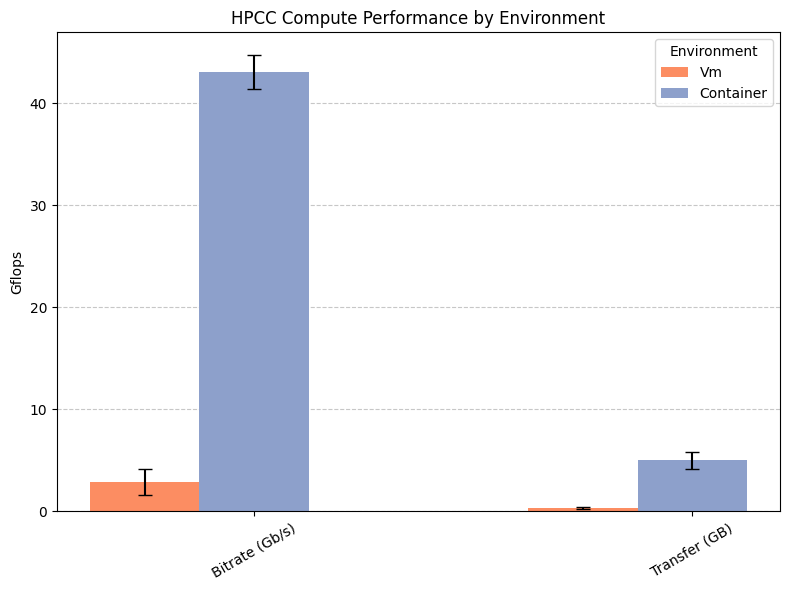

In [239]:
benchmarks = clean_tcp_download['Benchmark']
environments = ['vm', 'container']
means = clean_tcp_download[environments].values
stds = clean_tcp_download[['vm sd', 'container sd']].values

x = np.arange(len(benchmarks))
width = 0.25

palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2], palette[0]]  # VM, Container, Host

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(axis='y', linestyle='--', alpha=0.7,zorder=1)
bars = []
for i, env in enumerate(environments):
    bars.append(
        ax.bar(
            x + i*width - width, 
            means[:, i], 
            width, 
            yerr=stds[:, i], 
            label=env.capitalize(), 
            capsize=5,
            color=custom_colors[i],
            zorder=2,
        )
    )

ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=30)
ax.set_ylabel('Gflops')
ax.set_title('HPCC Compute Performance by Environment')
ax.legend(title='Environment')
plt.tight_layout()
plt.show()


# Save the plot as png in direcory../assets
# fig.savefig('../assets/hpcc_compute_performance.png', dpi=300, bbox_inches='tight')

In [240]:
udp = pd.read_csv('./iperf - UDP.csv')
udp.head()


,Support,Transfer,Unnamed: 2,Bitrate,Unnamed: 4,Jitter (ms),Lost/Total,Datagrams
0,vm,28.2,MBytes,236.0,Mbits/sec,0.026,0/20416,0.0000%
1,vm,38.5,MBytes,323.0,Mbits/sec,0.032,594/28499,-2.1000%
2,vm,40.0,MBytes,336.0,Mbits/sec,0.017,0/28977,0.0000%
3,vm,39.2,MBytes,329.0,Mbits/sec,0.014,0/28366,0.0000%
4,vm,39.2,MBytes,328.0,Mbits/sec,0.028,134/28485,-0.4700%


In [241]:

# Convert 'Transfer' and 'Bitrate' columns to decimal format
udp['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(udp['Transfer'], udp['Unnamed: 2'])
]
udp['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(udp['Bitrate'], udp['Unnamed: 4'])
]
# Drop the old columns and rename for clarity
udp = udp.drop(columns=['Transfer', 'Unnamed: 2', 'Bitrate', 'Unnamed: 4'])
# divide the column Bitrate (bits/sec) by 1e9 to convert to Gbps
udp['Bitrate (Gb/s)'] = udp['Bitrate (bits/sec)'] / 1e9
# divide the column Transfer (Bytes) by 1e9 to convert to GB
udp['Transfer (GB)'] = udp['Transfer (Bytes)'] / 1e9
# drop the old columns
udp.drop(columns=['Bitrate (bits/sec)', 'Transfer (Bytes)'], inplace=True)
udp

,Support,Jitter (ms),Lost/Total,Datagrams,Bitrate (Gb/s),Transfer (GB)
0,vm,0.026,0/20416,0.0000%,0.236,0.028200
1,vm,0.032,594/28499,-2.1000%,0.323,0.038500
2,vm,0.017,0/28977,0.0000%,0.336,0.040000
3,vm,0.014,0/28366,0.0000%,0.329,0.039200
4,vm,0.028,134/28485,-0.4700%,0.328,0.039200
...,...,...,...,...,...,...
82,container,0.002,0/144814,0.0000%,1.680,0.200000
83,container,0.001,0/148937,0.0000%,1.730,0.206000
84,container,0.002,7/148098,-0.0047%,1.720,0.205000
85,container,0.003,0/156340,0.0000%,1.810,0.216000


In [242]:

# remove the % symbol from the column Datagrams and convert to float
udp['Datagrams'] = udp['Datagrams'].str.replace('%', '').astype(float)
# take the absolute value of the column Datagrams
udp['Datagrams'] = udp['Datagrams'].abs()


In [243]:
# show the column datagrams for support vm
udp[udp['Support'] == 'vm']['Datagrams'].describe()

count    43.000000
mean     15.848372
std      15.986860
min       0.000000
25%       0.125000
50%      17.000000
75%      26.500000
max      63.000000
Name: Datagrams, dtype: float64

In [244]:
clean_udp = pd.DataFrame()
clean_udp['Benchmark'] = ['Jitter (ms)', 'Datagrams', 'Bitrate (Gb/s)', 'Transfer (GB)']

# For each metric, calculate mean and std for vm and container
metrics = ['Jitter (ms)', 'Datagrams', 'Bitrate (Gb/s)', 'Transfer (GB)']
vm_means = [udp.loc[udp['Support'] == 'vm', m].mean() for m in metrics]
vm_stds = [udp.loc[udp['Support'] == 'vm', m].std() for m in metrics]
container_means = [udp.loc[udp['Support'] == 'container', m].mean() for m in metrics]
container_stds = [udp.loc[udp['Support'] == 'container', m].std() for m in metrics]

clean_udp['vm'] = vm_means
clean_udp['vm sd'] = vm_stds
clean_udp['container'] = container_means
clean_udp['container sd'] = container_stds

clean_udp
print(df_to_latex_mean_pm_dev(clean_udp, environments=['vm', 'container']))

\begin{tabular}{lcc}
\toprule
Benchmark & Vm & Container \\
\midrule
Jitter (ms) & $0.04 \pm 0.03$ & $0.00 \pm 0.00$ \\
Datagrams & $15.85 \pm 15.99$ & $0.01 \pm 0.04$ \\
Bitrate (Gb/s) & $0.44 \pm 0.19$ & $1.61 \pm 0.31$ \\
Transfer (GB) & $0.05 \pm 0.02$ & $0.18 \pm 0.06$ \\
\bottomrule
\end{tabular}


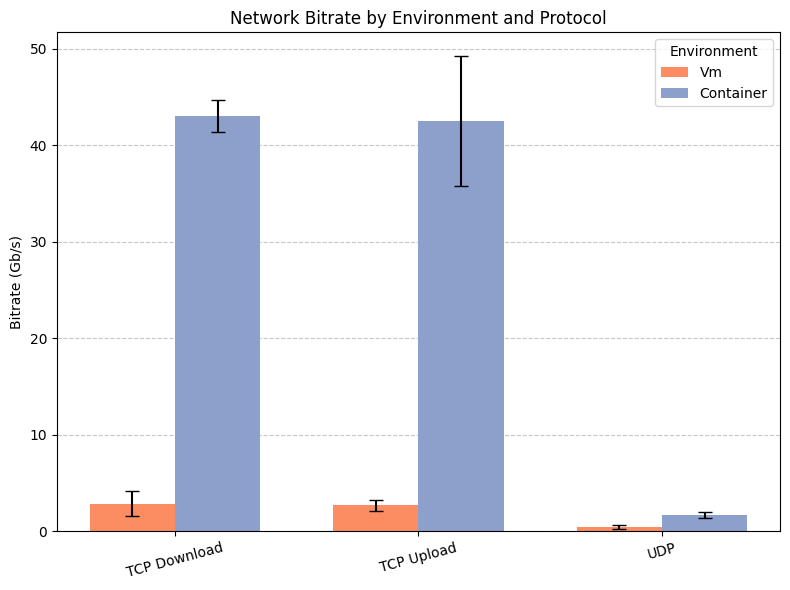

In [245]:
import numpy as np

# Prepare data for plotting
import matplotlib.pyplot as plt

benchmarks = ['TCP Download', 'TCP Upload', 'UDP']
environments = ['vm', 'container']

# Extract means and stds for Bitrate (Gb/s)
means = np.array([
    [clean_tcp_download.loc[clean_tcp_download['Benchmark'] == 'Bitrate (Gb/s)', 'vm'].values[0],
     clean_tcp_download.loc[clean_tcp_download['Benchmark'] == 'Bitrate (Gb/s)', 'container'].values[0]],
    [clean_tcp_upload.loc[clean_tcp_upload['Benchmark'] == 'Bitrate (Gb/s)', 'vm'].values[0],
     clean_tcp_upload.loc[clean_tcp_upload['Benchmark'] == 'Bitrate (Gb/s)', 'container'].values[0]],
    [clean_udp.loc[clean_udp['Benchmark'] == 'Bitrate (Gb/s)', 'vm'].values[0],
     clean_udp.loc[clean_udp['Benchmark'] == 'Bitrate (Gb/s)', 'container'].values[0]],
])

stds = np.array([
    [clean_tcp_download.loc[clean_tcp_download['Benchmark'] == 'Bitrate (Gb/s)', 'vm sd'].values[0],
     clean_tcp_download.loc[clean_tcp_download['Benchmark'] == 'Bitrate (Gb/s)', 'container sd'].values[0]],
    [clean_tcp_upload.loc[clean_tcp_upload['Benchmark'] == 'Bitrate (Gb/s)', 'vm sd'].values[0],
     clean_tcp_upload.loc[clean_tcp_upload['Benchmark'] == 'Bitrate (Gb/s)', 'container sd'].values[0]],
    [clean_udp.loc[clean_udp['Benchmark'] == 'Bitrate (Gb/s)', 'vm sd'].values[0],
     clean_udp.loc[clean_udp['Benchmark'] == 'Bitrate (Gb/s)', 'container sd'].values[0]],
])

x = np.arange(len(benchmarks))
width = 0.35

palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2]]  # VM, Container

fig, ax = plt.subplots(figsize=(8, 6))
bars = []
for i, env in enumerate(environments):
    bars.append(
        ax.bar(
            x + i*width - width/2,
            means[:, i],
            width,
            yerr=stds[:, i],
            label=env.capitalize(),
            capsize=5,
            color=custom_colors[i],
            zorder=2,
        )
    )

ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=15)
ax.set_ylabel('Bitrate (Gb/s)')
ax.set_title('Network Bitrate by Environment and Protocol')
ax.legend(title='Environment')
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

# Save the plot as png in directory ../assets
fig.savefig('../assets/network_bitrate_performance.png', dpi=300, bbox_inches='tight')